# Titanic - Machine Learning from Disaster

## K-Nearest Neighbors

In [1]:
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.25,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.28,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.92,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,26.55,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.05,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.00,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.00,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,675,11.72,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.00,C148,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["PassengerId", "Survived", "Name", "Cabin"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 8), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 8), (223,))

**Replace categorical to numeric representation**

**Split dataset into train and test sets**


In [8]:
X_test.shape, y_test.shape

((223, 8), (223,))

### K-Nearest Neighbors

In [9]:
from common import functions as func
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

**Building, train and predict model**

In [10]:
pipeline_clf = make_pipeline(
    StandardScaler(), 
    NeighborhoodComponentsAnalysis(), 
    KNeighborsClassifier())

pipeline_clf.fit(X_train, y_train)
y_predict = pipeline_clf.predict(X_test)

func.show_model_result(pipeline_clf, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.77653631 0.7752809  0.79213483 0.79213483 0.84831461]
Mean = 0.80 / Standard Deviation = 0.03

Confunsion Matrix
----------------------------------------------------------------------
[[107  27]
 [ 25  64]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       134
           1       0.70      0.72      0.71        89

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

----------------------------------------------------------------------
Accuracy: 0.77
Precicion: 0.70
Sensitivity aka Recall: 0.72
F1-Score: 0.71


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.76
----------------------------------------------------------------------


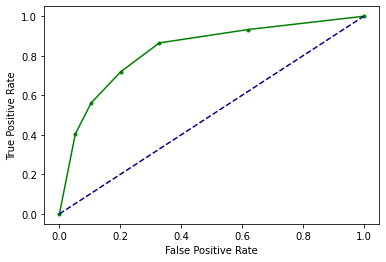

In [11]:
label = "K-Nearest Neighbor"
func.show_curve_roc(pipeline_clf, X_test, y_test, y_predict, label=label)